In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns 
from utils import data_operations as do

# Read the Dataframe from the json file

In [2]:
path='data/transactions.txt'
df = do.read_data(path)

# Summarize the Data

In [3]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


#### The Data has 786363 rows and 29 columns
#### The ranges of the important columns are:
1. creditLimit from 250 to 50000
2. availableMoney from -1005.63 to 50000
3. transactionAmount from 0 to 2011.54
4. currentBalance from 0 to 47498.81

In [4]:
df.info() # Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [5]:
df.isna().sum() # Check missing values

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

# Missing Value Treatment

### Drop Redundant Columns

#### There are 786363 records in total with 29 columns (isFraud is the label). We can see that echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises and recurringAuthInd  all have null values, and can thus be directly removed before getting into anything  

In [6]:
df.drop(['merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd', 'echoBuffer'], axis=1, inplace=True)

In [7]:
print(df.cardPresent.value_counts())
len(df[df.cardPresent==True])/len(df)*100

False    433495
True     352868
Name: cardPresent, dtype: int64


44.87342359699019

#### Non-card transactions make almost 55.23% of overall records. Now I want to see if each account number has a unique customerID or not

In [8]:
df.groupby('accountNumber')['customerId'].nunique().sort_values(ascending=False)

accountNumber
100088067    1
697287398    1
698359563    1
698303158    1
698276255    1
            ..
400746592    1
400361607    1
400050532    1
400027501    1
999389635    1
Name: customerId, Length: 5000, dtype: int64

#### It seems that each account number has a unique customer ID, so one of these columns are redundant.

In [9]:
df.drop(['accountNumber'], axis=1, inplace=True)

In [10]:
# acqCountry has a small number of missing values
print(df['acqCountry'].isna().sum())
# If we should drop these rows or not will depend on the distribution of isFraud in them
print(df[df['acqCountry'].isna()]['isFraud'].value_counts())
# Compared to overall isFraud Distribution
df['isFraud'].value_counts()

4562
False    4413
True      149
Name: isFraud, dtype: int64


False    773946
True      12417
Name: isFraud, dtype: int64

#### So, the overall label distribution is about 62:1 while for na values of acqCountry it is about 30:1. So it makes sense to not drop these columns to make the binary classification problem even more imbalanced and instead add a value of 'UK' (denoting unknown) for them  

In [11]:
df['acqCountry'].fillna('UNKNOWN',inplace=True)

In [12]:
# Similarly, we now look at missing values of  merchantCountryCode's isFraud distribution
print(df[df['merchantCountryCode'].isna()]['isFraud'].value_counts())
# Again the label distribution is much better than the overall label distribution. So, we impute 'UNKNOWN' into this 
df['merchantCountryCode'].fillna('UNKNOWN',inplace=True)

False    642
True      82
Name: isFraud, dtype: int64


#### Filling both these categories to be 0 as the category 0 does not exist in the data

In [13]:
# We look at posEntryMode next, and do the same treatment
print(df[df['posEntryMode'].isna()]['isFraud'].value_counts())
# It is better to impute value instead of dropping
df['posEntryMode'].fillna(0,inplace=True)

False    3785
True      269
Name: isFraud, dtype: int64


In [14]:
# We look at posEntryMode next, and do the same treatment
print(df[df['posConditionCode'].isna()]['isFraud'].value_counts())
# It is better to impute value instead of dropping
df['posConditionCode'].fillna(0,inplace=True)

False    387
True      22
Name: isFraud, dtype: int64


In [15]:
# We look at transactionType next, and do the same treatment with UK denoting unknown
print(df[df['transactionType'].isna()]['isFraud'].value_counts())
# It is better to impute value instead of dropping
df['transactionType'].fillna('UK',inplace=True)

False    684
True      14
Name: isFraud, dtype: int64


#### Now, we will try to figure out the other categorical variables in the data and try to find their statistics 

# Categorical Value Treatment

In [16]:
df.nunique()

customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
currentBalance              487318
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64

#### This shows that creditLimit, acqCountry, merchantCountryCode, posEntryMode, posConditionCode, merchantCategoryCode, cardPresent and expirationDateKeyInMatch are also categorical feature columns. Let us dive deeper into them

In [17]:
# Let us now look at the Frequency of each Category
cat_cols=['creditLimit', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'cardPresent', 'expirationDateKeyInMatch']
for col in cat_cols:
    print(str(col)+' Distribution:')
    print(do.display_value_counts(df, col))

creditLimit Distribution:
   creditLimit   Count
0         5000  201863
1        15000  139307
2         7500   97913
3         2500   75429
4        20000   68629
5        10000   56889
6        50000   48781
7         1000   36430
8          250   34025
9          500   27097
acqCountry Distribution:
  acqCountry   Count
0         US  774709
1    UNKNOWN    4562
2        MEX    3130
3        CAN    2424
4         PR    1538
merchantCountryCode Distribution:
  merchantCountryCode   Count
0                  US  778511
1                 MEX    3143
2                 CAN    2426
3                  PR    1559
4             UNKNOWN     724
posEntryMode Distribution:
  posEntryMode   Count
0           05  315035
1           09  236481
2           02  195934
3           90   19576
4           80   15283
5            0    4054
posConditionCode Distribution:
  posConditionCode   Count
0               01  628787
1               08  149634
2               99    7533
3                0     409
me

In [18]:
# Check The label Distribution
df['isFraud'].value_counts()

False    773946
True      12417
Name: isFraud, dtype: int64

In [19]:
df['transactionAmount'].median()

87.9

In [20]:
df['creditLimit'].median()

7500.0

# Exploring Correlation between the values

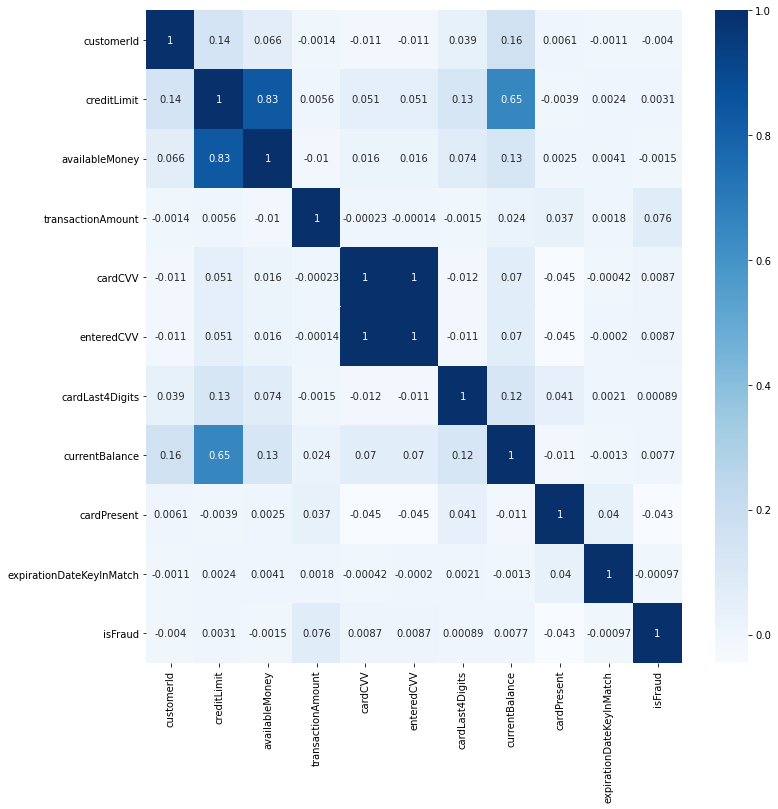

In [21]:
plt.figure(figsize=(12,12))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.savefig('figs/Correlation_heatmap.png')

#### This shows that enteredCVV and cardCVV has high correlation. So, dropping one of them. Also, credit limit and current balance has moderate correlation, which makes sense because most credit card spenders make monthly spends as a particular linear factor of their credit limit. So, the available balance will be linear to the overall credit limit as well, explaining the strong positive correlation 

In [22]:
df.drop(['enteredCVV'],axis=1, inplace=True)

In [23]:
len(df.columns)

21

In [24]:
len(df['customerId'].unique())

5000

In [25]:
len(df['merchantName'].unique())

2490

In [26]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
print(np.min(df['transactionDateTime']))
print(np.max(df['transactionDateTime']))

2016-01-01 00:01:02
2016-12-30 23:59:45


#### This shows the following insights:
1. Most transactions have a credit limit of 5000 followed by a credit limit of 15000 and most of the transactions were from USA but the missing value imputation comes second. There is a high possibility of most of them coming from USA as well. It could be possible a good portion of the UNKNOWN transactions were based in Mexico judging by the fact that Mexico has the second highest instances in merchantCountryCode.
2. Online retail seems to be the highest spending category in this data followed by fast-food and entertainment.
3. Looking at the data, there are 5000 unique customer IDs with 2490 merchant Names.
4. The label distribution is highly imbalanced, which means that using accuracy as the evaluation metric of our predictive model will not be a good one. ROC-AUC score and F-1 score will be more important.
5. There are 786363 total records with 29 columns initially, which we have reduced to 21.
6. The total dataset has all transactions for 1-year period from 2016/01/01 - 2016/12/30.

Also, based on the summary statistics,

Mean Transaction Value= 136.98 (with high standard deviation of 144)

Median Transaction Value = 87.9, which means that the distribution of Transaction Amount has a right skew (As mean is greater than median).

Mean Credit Limit = 10759.46 (with standard deviation of 11636.17)

Median Credit Limit= 7500 (Slight left skewed distribution).

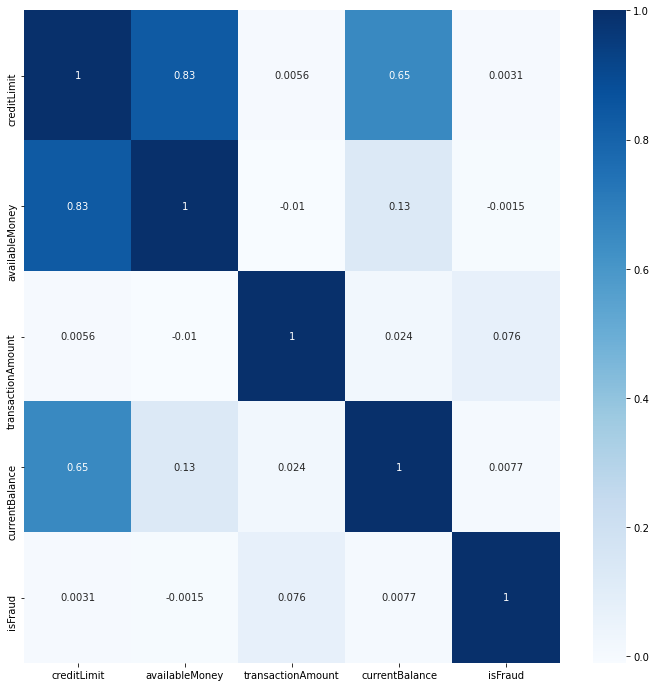

In [29]:
plt.figure(figsize=(12,12))
cor=df[['creditLimit','availableMoney','transactionAmount','currentBalance','isFraud']].corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.savefig('figs/Correlation_heatmap1.png')

In [28]:
df.to_csv('data/transactions_processed.csv',index=False) 